<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/Tutorials/NLP/Coherence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following these two medium articles by Shashank Kapakia we will do another exploration of LDA

[Link 1](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)
<br>
[Link 2](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

In `LDA.ipybn` we noticed that changing the method of data-preprocessing significantly influence the clustering results of LDA. Here we will further tune the model hyperparameters and attempt to produce the best model by evaluating the coherence metric.

# First Implementation

In [ ]:
from google.colab import files
files.upload()

Saving NIPS Papers.zip to NIPS Papers.zip


In [ ]:
!mkdir data

In [ ]:
import zipfile
with zipfile.ZipFile("NIPS Papers.zip", "r") as zip_ref:
  zip_ref.extractall("data")

In [ ]:
import pandas as pd
papers = pd.read_csv("data/NIPS Papers/papers.csv")
papers.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


## Text Preprocessing

First we are going to remove punctuation and lowercase all words

In [ ]:
papers = papers.drop(["id", "event_type", "pdf_name"], axis=1)

In [ ]:
# Lets take a sample of the papers

papers = papers.sample(100)
papers.head(10)

,year,title,abstract,paper_text
2328,2006,Efficient Learning of Sparse Representations w...,Abstract Missing,Efficient Learning of Sparse Representations\n...
2247,2006,Unsupervised Regression with Applications to N...,Abstract Missing,Unsupervised Regression with Applications to\n...
3639,2011,Gaussian Process Training with Input Noise,In standard Gaussian Process regression input ...,Gaussian Process Training with Input Noise\n\n...
1798,2004,Approximately Efficient Online Mechanism Design,Abstract Missing,Approximately Efficient Online Mechanism\nDesi...
3221,2010,Feature Construction for Inverse Reinforcement...,The goal of inverse reinforcement learning is ...,Feature Construction for Inverse Reinforcement...
2595,2007,Consistent Minimization of Clustering Objectiv...,Abstract Missing,Consistent Minimization of Clustering Objectiv...
4846,2014,Learning on graphs using Orthonormal Represent...,Existing research \cite{reg} suggests that emb...,Learning on graphs using Orthonormal\nRepresen...
4251,2012,Learning Image Descriptors with the Boosting-T...,In this paper we apply boosting to learn ...,Learning Image Descriptors with the Boosting-T...
5603,2016,Asynchronous Parallel Greedy Coordinate Descent,"n this paper, we propose and study an Asynchro...",Asynchronous Parallel Greedy Coordinate Descen...
2474,2007,Optimal models of sound localization by barn owls,Sound localization by barn owls is commonly mo...,Optimal models of sound localization by barn o...


In [ ]:
# Take a look at what a single paper looks like

paper = papers["paper_text"].iloc[0]
sentences = paper.split("\n")
print(sentences[:10])

['Efficient Learning of Sparse Representations', 'with an Energy-Based Model', '', 'Marc?Aurelio Ranzato Christopher Poultney Sumit Chopra Yann LeCun', 'Courant Institute of Mathematical Sciences', 'New York University, New York, NY 10003', '{ranzato,crispy,sumit,yann}@cs.nyu.edu', '', 'Abstract', 'We describe a novel unsupervised method for learning sparse, overcomplete features. The model uses a linear encoder, and a linear decoder preceded by a sparsifying non-linearity that turns a code vector into a quasi-binary sparse code vector. Given an input, the optimal code minimizes the distance between the output']


In [ ]:
# Remove punctuation and lower case text
import re

processed = pd.DataFrame()
processed["text"] = papers["paper_text"].map(lambda x: re.sub('[,\.!?]', '', x))
processed["text"] = processed["text"].map(lambda x: x.lower())

processed.head(10)

,text
2328,efficient learning of sparse representations\n...
2247,unsupervised regression with applications to\n...
3639,gaussian process training with input noise\n\n...
1798,approximately efficient online mechanism\ndesi...
3221,feature construction for inverse reinforcement...
2595,consistent minimization of clustering objectiv...
4846,learning on graphs using orthonormal\nrepresen...
4251,learning image descriptors with the boosting-t...
5603,asynchronous parallel greedy coordinate descen...
2474,optimal models of sound localization by barn o...


In [ ]:
paper = processed["text"].iloc[0].split("\n")
print(paper[:10])

['efficient learning of sparse representations', 'with an energy-based model', '', 'marcaurelio ranzato christopher poultney sumit chopra yann lecun', 'courant institute of mathematical sciences', 'new york university new york ny 10003', '{ranzatocrispysumityann}@csnyuedu', '', 'abstract', 'we describe a novel unsupervised method for learning sparse overcomplete features the model uses a linear encoder and a linear decoder preceded by a sparsifying non-linearity that turns a code vector into a quasi-binary sparse code vector given an input the optimal code minimizes the distance between the output']


## EDA

In [ ]:
!pip install wordcloud

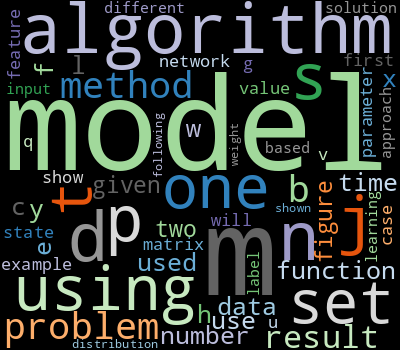

In [ ]:
from wordcloud import WordCloud

# Join the text together
joined_text = ",".join(list(processed["text"].values))

# Create WordCloud
wordcloud = WordCloud(background_color="black",
                      max_words=500,
                      contour_width=3,
                      contour_color="steelblue",
                      colormap='tab20c',
                      min_font_size=12,
                      width=400,
                      height=350)
wordcloud.generate(joined_text)
wordcloud.to_image()

## More Preprocessing

Let's transform the textual data into an encoding that our model can understand.
- Remove stopwords
- Tokenize text
- Convert text into gensim corpus
- Create id2word Dictionary

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create stopwords
stop_words = stopwords.words('english')
stop_words.extend(["from", 'subject', 're', "edu", 'Use', "et", "al"])

def sent_to_words(text):
  for sentence in text:
    # yield returns a generator object instead of the objects themselves. Used when we want to iterator over a sequence but not store entire sequence in memory
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
data = processed["text"].values.tolist()

# Creates a list of list (document -> sentence)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

In [ ]:
# Let's look at the result

print(f"Number of texts : {len(data_words)}")
print(f"Number of sentences in first text : {len(data_words[0])}")
print(data_words[0][:30])

Number of texts : 100
Number of sentences in first text : 2785
['efficient', 'learning', 'sparse', 'representations', 'energy', 'based', 'model', 'marcaurelio', 'ranzato', 'christopher', 'poultney', 'sumit', 'chopra', 'yann', 'lecun', 'courant', 'institute', 'mathematical', 'sciences', 'new', 'york', 'university', 'new', 'york', 'ny', 'csnyuedu', 'abstract', 'describe', 'novel', 'unsupervised']


In [ ]:
# Create the corpora
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 5), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 3), (15, 1), (16, 3), (17, 2), (18, 3), (19, 3), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


## Create and Fit Model

In [ ]:
# Build Model
from pprint import pprint

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10)

pprint(lda_model.print_topics())

[(0,
  '0.007*"learning" + 0.006*"function" + 0.005*"model" + 0.005*"set" + '
  '0.004*"data" + 0.004*"algorithm" + 0.004*"one" + 0.004*"matrix" + '
  '0.003*"two" + 0.003*"also"'),
 (1,
  '0.005*"data" + 0.005*"model" + 0.004*"learning" + 0.004*"set" + '
  '0.004*"function" + 0.004*"figure" + 0.004*"using" + 0.004*"one" + '
  '0.004*"neural" + 0.004*"algorithm"'),
 (2,
  '0.006*"model" + 0.006*"algorithm" + 0.006*"set" + 0.005*"function" + '
  '0.005*"learning" + 0.004*"time" + 0.004*"data" + 0.004*"using" + '
  '0.004*"problem" + 0.004*"distribution"'),
 (3,
  '0.007*"data" + 0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + '
  '0.005*"time" + 0.005*"function" + 0.004*"using" + 0.004*"training" + '
  '0.004*"number" + 0.004*"matrix"'),
 (4,
  '0.006*"model" + 0.006*"learning" + 0.006*"set" + 0.006*"data" + '
  '0.005*"using" + 0.004*"algorithm" + 0.003*"models" + 0.003*"one" + '
  '0.003*"two" + 0.003*"number"'),
 (5,
  '0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + 0.

In [ ]:
!pip install pyldavis
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

We get sub-optimal performance with many repeated words in each topic and no distinguishing features between topics. Most topics seem to be related to the same few words surrounding model development.

In [ ]:
# Look at Model Results
import pyLDAvis.gensim
import pickle
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.001074  0.004227       1        1  18.498634
3     -0.000112  0.003157       2        1  12.832236
8     -0.005370  0.002053       3        1  11.384949
4     -0.005019 -0.002749       4        1  10.635184
1     -0.000184 -0.000858       5        1   9.856343
6      0.005748  0.001238       6        1   9.414779
9     -0.000558  0.002755       7        1   8.127228
2      0.000765 -0.003737       8        1   7.634154
0      0.005086 -0.002847       9        1   5.860645
7     -0.001431 -0.003240      10        1   5.755847, topic_info=              Term         Freq        Total Category  logprob  loglift
1184         model  4288.000000  4288.000000  Default  30.0000  30.0000
889           data  3800.000000  3800.000000  Default  29.0000  29.0000
423         number  2315.000000  2315.000000  Default  28.0000  28.0000
637           time  2442.000000  2442.000000  Default  27.0000  27.0000
564            set  3186.000000  3186.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
669          using   128.865739  2894.785043  Topic10  -5.7666  -0.2569
165   distribution   103.242866  1924.913103  Topic10  -5.9883  -0.0706
1839        matrix   104.405778  1981.589339  Topic10  -5.9771  -0.0884
533        results    96.205963  1870.398448  Topic10  -6.0589  -0.1125
2683        neural    93.477487  1664.152391  Topic10  -6.0876  -0.0244

[889 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
14844      1  0.079232  accompaniment
14844      2  0.099040  accompaniment
14844      3  0.059424  accompaniment
14844      4  0.138656  accompaniment
14844      5  0.198079  accompaniment
...      ...       ...            ...
14840      9  0.048873            zik
14840     10  0.048873            zik
19505      2  0.215492            zvk
19505      5  0.215492            zvk
19505      7  0.215492            zvk

[4400 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 9, 5, 2, 7, 10, 3, 1, 8])

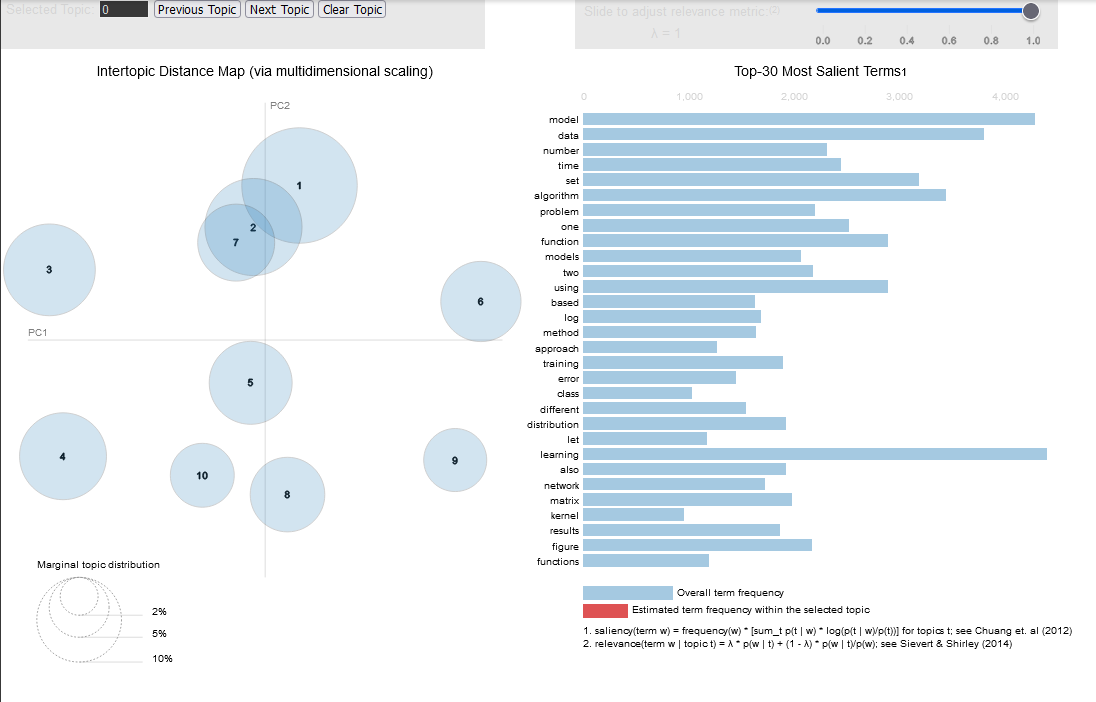

# Second Implementation

Here we will tune the model to account for coherence scores. Remember coherence is a measure of semantic similarity between words in a topic. We want to maximize coherence within each topic.


## Bigrams and Trigrams

In [ ]:
# Build Bigrams and Trigrams

bigrams = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigrams = gensim.models.Phrases(bigrams[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigrams)
trigram_mod = gensim.models.phrases.Phraser(trigrams)

In [ ]:
import spacy

def make_bigram(texts):
  return [bigram_mod[text] for text in texts]

def make_trigram(texts):
  return [trigram_mod[text] for text in texts]

def lemmatization(texts, allowed_postages=['NOUN', "ADJ", "VERB", "ADV"]):
  text_out = []
  for text in texts:
    doc = nlp(" ".join(text))
    text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postages])
  return text_out

In [ ]:
#Remove stopwords
data_words_nostop = remove_stopwords(data_words)

# Form bigrams and trigrams
data_words_bigrams = make_bigram(data_words_nostop)
data_words_bigrams_trigrams = make_trigram(data_words_bigrams)

data = data_words_bigrams_trigrams

# Lemmatize
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
data_lemmatized = lemmatization(data)

In [ ]:
data_lemmatized[0][:30]

['efficient',
 'learn',
 'sparse',
 'representation',
 'energy',
 'base',
 'model',
 'abstract',
 'describe',
 'novel',
 'unsupervise',
 'method',
 'learn',
 'feature',
 'model',
 'use',
 'linear',
 'encoder',
 'decoder',
 'precede',
 'sparsifye',
 'non_linearity',
 'turn',
 'vector',
 'give',
 'input',
 'optimal',
 'code',
 'minimizes',
 'distance']

In [ ]:
len(data_lemmatized)

100

In [ ]:
id2word2 = corpora.Dictionary(data_lemmatized)

corpus2 = [id2word2.doc2bow(text) for text in data_lemmatized]

print(corpus2[0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 7), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 2), (15, 2), (16, 6), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 5)]


## Create Base Model

Here are some additional parameters for the gensim model
- **Chunksize** : How many documents are processed at a time in training
- **Passe** : How often we train model on entire corpus (epochs)

Acoording to gensim docs we can also change the $\alpha, \eta$ parameters which controls the sparsity of topics. Here will will use defaults of 1.0 per num_topics.

In [ ]:
lda_model2 = gensim.models.LdaMulticore(corpus=corpus2,
                                        id2word=id2word2,
                                        num_topics=10,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [ ]:
# Check the weightage of each keyword

pprint(lda_model2.print_topics())

[(0,
  '0.013*"use" + 0.009*"datum" + 0.009*"function" + 0.008*"sample" + '
  '0.007*"set" + 0.007*"problem" + 0.007*"result" + 0.007*"probability" + '
  '0.007*"word" + 0.006*"show"'),
 (1,
  '0.018*"classifier" + 0.014*"training" + 0.010*"neural" + 0.009*"food" + '
  '0.009*"behavior" + 0.008*"use" + 0.007*"problem" + 0.007*"time" + '
  '0.007*"insect" + 0.006*"energy"'),
 (2,
  '0.014*"matrix" + 0.013*"model" + 0.011*"set" + 0.010*"label" + 0.009*"use" '
  '+ 0.008*"graph" + 0.007*"show" + 0.006*"topic" + 0.006*"function" + '
  '0.006*"result"'),
 (3,
  '0.012*"use" + 0.011*"feature" + 0.009*"learn" + 0.008*"function" + '
  '0.008*"time" + 0.007*"network" + 0.007*"set" + 0.007*"datum" + '
  '0.007*"state" + 0.007*"method"'),
 (4,
  '0.012*"use" + 0.011*"model" + 0.010*"function" + 0.008*"problem" + '
  '0.008*"set" + 0.007*"point" + 0.007*"input" + 0.007*"method" + '
  '0.006*"result" + 0.006*"time"'),
 (5,
  '0.014*"model" + 0.010*"learn" + 0.010*"function" + 0.010*"time" + '
  '0.

In [ ]:
# Calculate coherence score

from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model2,
                                     texts=data_lemmatized,
                                     dictionary=id2word2,
                                     coherence="c_v")

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.2690605735563361


## Tuning Model

We can perform a series of sensitivity tests to determine the model parameters
- Number of Topics (K)
- Dirichlet hyperparameter alpha : Document-Topic Density
- Dirichlet hyperparameter beta : Word-Topic Density

In [ ]:
# Functionize the coherence score

def get_coherence(corpus, dictionary, k, a, b):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                         id2word=dictionary,
                                         num_topics=k,
                                         random_state=42,
                                         chunksize=100,
                                         passes=10,
                                         alpha=a,
                                         eta=b)

  coherence_model = CoherenceModel(model=lda_model,
                                   texts=data_lemmatized,
                                   dictionary=dictionary,
                                   coherence="c_v")

  return coherence_model.get_coherence()

In [ ]:
from os import symlink
import numpy as np
import tqdm.auto as tqdm

grid = {}
grid["validation_set"] = {}

# From 3 - 10 topics
topics = range(3, 10, 1)

# Alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


#Validation Sets
num_docs = len(corpus2)
corpus_sets = [gensim.utils.ClippedCorpus(corpus2, int(num_docs*0.75)), corpus2]
corpus_title = ["'75% Corpus", '100% Corpus']

model_results = {'Validation_Set' : [],
                 "Topics" : [],
                 "Alpha" : [],
                 "Beta": [],
                 'Coherence': []}



In [ ]:
corpus_sets[0]

In [ ]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = get_coherence(corpus=corpus_sets[i], dictionary=id2word2,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pbar.update(1)
    pbar.close()

  0%|          | 0/420 [00:00<?, ?it/s]

In [ ]:
# Lets create some plots visualizing the coherence scores
results_df = pd.DataFrame(data=model_results)
results_df = results_df.drop("Validation_Set", axis=1)
results_df.head(5)

,Topics,Alpha,Beta,Coherence
0,3,0.01,0.01,0.245337
1,3,0.01,0.31,0.247525
2,3,0.01,0.61,0.261240
3,3,0.01,0.91,0.252201
4,3,0.01,symmetric,0.252590


In [ ]:
averages = results_df.groupby('Topics')["Coherence"].mean()
averages

Topics
3    0.253004
4    0.260061
5    0.266608
6    0.262188
7    0.282258
8    0.303391
9    0.307972
Name: Coherence, dtype: float64

Text(0, 0.5, 'Coherence')

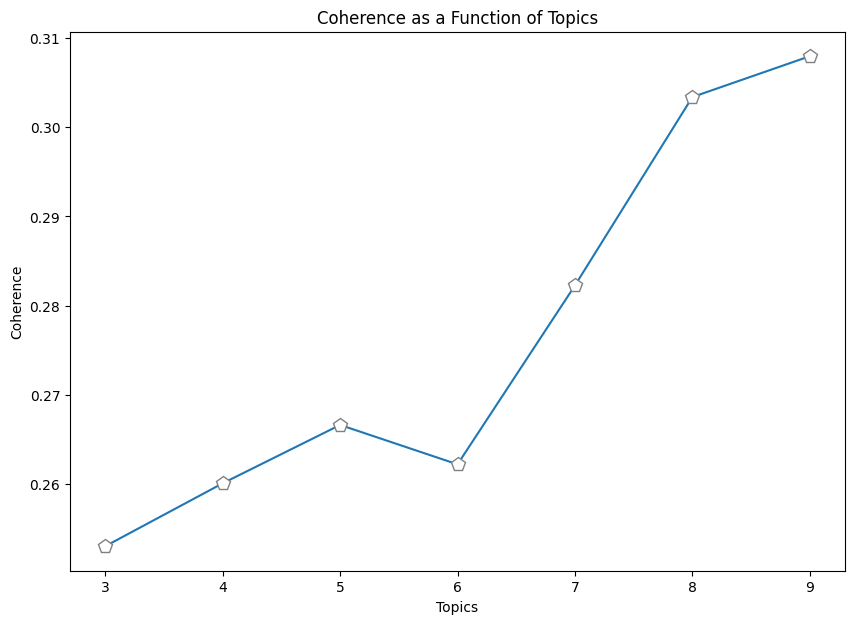

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(averages, '-p', markersize=10, markerfacecolor="white", markeredgecolor="gray")
plt.title("Coherence as a Function of Topics")
plt.xlabel("Topics")
plt.ylabel("Coherence")

This gives us the optimal model to be
- 9 topics
- Asymmetric alpha value
- 0.91 beta vaue

In [ ]:
# Find the optimal alpha and beta values

df_9_topic = results_df.loc[results_df["Topics"] == 9]
df_9_topic.sort_values("Coherence", ascending=False)

,Topics,Alpha,Beta,Coherence
418,9,asymmetric,0.91,0.359825
192,9,0.61,0.61,0.353647
187,9,0.31,0.61,0.353647
182,9,0.01,0.61,0.353647
202,9,symmetric,0.61,0.353647
197,9,0.91,0.61,0.351182
403,9,0.61,0.91,0.349995
398,9,0.31,0.91,0.349967
413,9,symmetric,0.91,0.347404
207,9,asymmetric,0.61,0.346790


In [ ]:
final_model = gensim.models.LdaMulticore(corpus=corpus2,
                                         id2word=id2word2,
                                         num_topics=9,
                                         random_state=42,
                                         chunksize=100,
                                         passes=10,
                                         alpha="asymmetric",
                                         eta=0.91)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(final_model, corpus2, id2word2)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.173599 -0.013210       1        1  60.387098
1     -0.091563  0.054321       2        1  15.782039
4     -0.052899  0.008493       3        1   8.981442
0     -0.005838 -0.074277       4        1   6.928217
7      0.037678 -0.024899       5        1   3.321423
6      0.062717  0.017060       6        1   1.676779
5      0.067837 -0.004290       7        1   1.286716
2      0.070306  0.018995       8        1   0.846287
3      0.085361  0.017806       9        1   0.789999, topic_info=        Term         Freq        Total Category  logprob  loglift
380    model  1601.000000  1601.000000  Default  30.0000  30.0000
398  network   523.000000   523.000000  Default  29.0000  29.0000
648     time   784.000000   784.000000  Default  28.0000  28.0000
552   sample   564.000000   564.000000  Default  27.0000  27.0000
678    value   592.000000   592.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
906    label     1.325514   540.139800   Topic9  -7.0057  -1.1691
540   result     1.327770   856.449723   Topic9  -7.0040  -1.6284
633    table     1.248551   197.914715   Topic9  -7.0655  -0.2250
693     well     1.262091   412.217377   Topic9  -7.0547  -0.9479
567      set     1.236743  1352.090016   Topic9  -7.0750  -2.1560

[583 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4389      1  0.247528  achievable
4389      2  0.123764  achievable
4389      3  0.123764  achievable
4389      4  0.123764  achievable
4389      5  0.123764  achievable
...     ...       ...         ...
698       9  0.004683        word
9250      1  0.083184        zpre
9250      2  0.083184        zpre
9250      3  0.748659        zpre
9250      4  0.083184        zpre

[2419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 5, 1, 8, 7, 6, 3, 4])

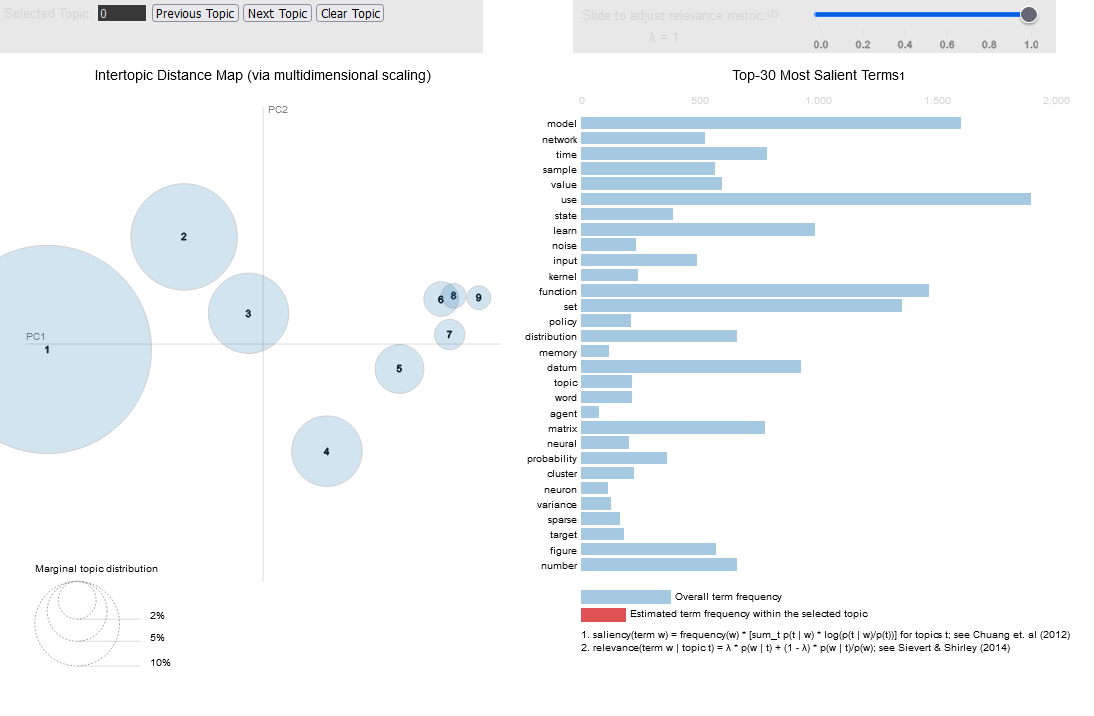

LDA works but heavily depends on preparing data properly. Without the right preprocessing, LDA will often output very generic results that are not "human interpretable". Even in the example with a tuned model, it is still difficult to distinguish / assign meaning to each of the topics.